# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Are People a Good Judge of Their Own Sleep and Health?
### Alcohol as a Predictor of Sleep and Health Quality

In this notebook we want to take a look at how alcohol affects how people perceive their own health and sleep.<br>
• We will be looking at many people are guily of exceeding recommended thresholds<br>
• We will also see if the number of people over-drinking gets bigger as people's heatlh worsens

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import matplotlib.ticker as mtick
import numpy as np

## Parameters
Here we will load in the files needed in our notebook.<br>
One parameter contains the directory of the clean version of our 2013 "Health and Sleep" Sleep Foundation Survey<br>
The other contains the directory to our dataset containing recommended standards for various substances

In [2]:
clean_2013_POLLDATASET = '../data_file/cleaned_data_csv/clean_2013_POLLDATASET.csv'
LIMIT_DATASET = '../data_file/recommendation_data/substance_limit.csv'

## Load Cleaned Dataset
Our data is in CSV format so we will use the Pandas .read_csv()

In [3]:
clean_2013Poll = pd.read_csv(clean_2013_POLLDATASET)

## Examine Contents of Our Clean Dataset
We want to ensure that the csv file was read in correctly.<br>
We will print the data frame and its unique columns available

In [4]:
display(clean_2013Poll)
print(clean_2013Poll.columns.values)
print(f"\nclean_2013Poll has {len(clean_2013Poll.columns.values)} columns.\nclean_2013Poll shape : {clean_2013Poll.shape}")

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


['id' 'age' 'employment_status' 'gender' 'state' 'bed_time_weekdays'
 'wake_up_weekdays' 'bed_time_wrong' 'wake_up_wrong' 'time_awake_wrong'
 'time_awake_hours_wrong' 'bed_time_weekends' 'wake_up_weekends'
 'hours_sleep_weekday' 'mins_sleep_weekday' 'total_mins_sleep_weekday'
 'total_hours_sleep_weekday' 'hours_sleep_weekend' 'mins_sleep_weekend'
 'total_mins_sleep_weekend' 'total_hours_sleep_weekend'
 'diff_mins_weekend_weekday' 'diff_hours_weekend_weekday' 'naps_weekday'
 'nap_mins_weekday' 'naps_weekend' 'naps_mins_weekend'
 'good_rest_often_weekday' 'good_rest_often_weekend' 'read_doze_chance'
 'tv_doze_chance' 'car_traffic_doze_chance' 'passenger_doze_chance'
 'chatting_doze_chance' 'after_lunch_no_aclohol__doze_chance'
 'lying_down_doze_chance' 'minimum_sleep_opinion'
 'schedule_allows_enough_sleep' 'sleep_affect_work'
 'sleep_affect_social_activities' 'sleep_affect_home_responsibilities'
 'sleep_affect_mood' 'sleep_affect_sexual_relationship'
 'fall_asleep_weekday_mins' 'fall_as

We can see that the clean data set contains 140 renamed columns and 1000 rows. <br>
From that we know that the clean csv file was successfully loaded in and we can now begin analysing this data.

## Loading in the External Dataset Containing Caffeine Limits
Our substance dataset is in CSV format so we will use the Pandas .read_csv()

In [5]:
substance_df = pd.read_csv(LIMIT_DATASET)
display(substance_df)
print(f"\nsubstance_df has {len(substance_df.columns.values)} columns.\nsubstance_df shape : {substance_df.shape}")

,gender_timeframe,alcohol_(drink),tobacco,caffeine_(mg)
0,men_limit_day,2,0,400
1,women_limit_day,1,0,400
2,men_limit_week,14,0,2800
3,women_limit_week,7,0,2800
4,men_limit_2_week,28,0,5600
5,women_limit_2_week,14,0,5600



substance_df has 4 columns.
substance_df shape : (6, 4)


## Set the Index of Substance DF
We want to set the index of our substance_df as the column ['gender_timeframe']. This will allow us to use .loc to easily find the limit of any substance based on the gender and timeframe we need.

In [6]:
substance_df = substance_df.set_index('gender_timeframe')
substance_df

,alcohol_(drink),tobacco,caffeine_(mg)
gender_timeframe,,,
men_limit_day,2,0,400
women_limit_day,1,0,400
men_limit_week,14,0,2800
women_limit_week,7,0,2800
men_limit_2_week,28,0,5600
women_limit_2_week,14,0,5600


## Finding the Alcohol Limit for Men and Women 

In [7]:
substance_df['alcohol_(drink)']

gender_timeframe
men_limit_day          2
women_limit_day        1
men_limit_week        14
women_limit_week       7
men_limit_2_week      28
women_limit_2_week    14
Name: alcohol_(drink), dtype: int64

## Finding the Alcohol Limit for Men and Women for a 2 week timeframe.
We want to find what the how much alcohol men and women can consume in 2 weeks. 

In [8]:
male_alcohol_limit = substance_df.loc['men_limit_2_week', 'alcohol_(drink)'] 
female_alcohol_limit = substance_df.loc['women_limit_2_week', 'alcohol_(drink)'] 

if (male_alcohol_limit == female_alcohol_limit):
    print(f"Male Alcohol Limit ({male_alcohol_limit} Standard Drinks) is the same as Female Alcohol Limit ({female_alcohol_limit} Standard Drinks) ")
    
else:
     print(f"Male Alcohol Limit ({male_alcohol_limit} Standard Drinks) is NOT the same as Female Alcohol Limit ({female_alcohol_limit} Standard Drinks) ")


Male Alcohol Limit (28 Standard Drinks) is NOT the same as Female Alcohol Limit (14 Standard Drinks) 


## Create an Alcohol DF to Work With in this Notebook
We want the alcohol df to contain the same information as the clean_2013Poll df. For that reason we will create the alcohol df as a copy of th clean_2013Poll df.

In [9]:
alcohol_df = clean_2013Poll.copy()
display(alcohol_df)
print(alcohol_df.columns.values)
print(f"\nalcohol_df has {len(alcohol_df.columns.values)} columns.\nalcohol_df shape : {alcohol_df.shape}")

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


['id' 'age' 'employment_status' 'gender' 'state' 'bed_time_weekdays'
 'wake_up_weekdays' 'bed_time_wrong' 'wake_up_wrong' 'time_awake_wrong'
 'time_awake_hours_wrong' 'bed_time_weekends' 'wake_up_weekends'
 'hours_sleep_weekday' 'mins_sleep_weekday' 'total_mins_sleep_weekday'
 'total_hours_sleep_weekday' 'hours_sleep_weekend' 'mins_sleep_weekend'
 'total_mins_sleep_weekend' 'total_hours_sleep_weekend'
 'diff_mins_weekend_weekday' 'diff_hours_weekend_weekday' 'naps_weekday'
 'nap_mins_weekday' 'naps_weekend' 'naps_mins_weekend'
 'good_rest_often_weekday' 'good_rest_often_weekend' 'read_doze_chance'
 'tv_doze_chance' 'car_traffic_doze_chance' 'passenger_doze_chance'
 'chatting_doze_chance' 'after_lunch_no_aclohol__doze_chance'
 'lying_down_doze_chance' 'minimum_sleep_opinion'
 'schedule_allows_enough_sleep' 'sleep_affect_work'
 'sleep_affect_social_activities' 'sleep_affect_home_responsibilities'
 'sleep_affect_mood' 'sleep_affect_sexual_relationship'
 'fall_asleep_weekday_mins' 'fall_as

We don't want to with with a dataframe that contains nan values to we will drop them

In [10]:
alcohol_df = alcohol_df[alcohol_df['standard_drinks_a_day'].notna()]
print(f"\nAfter dropping nan values:\nalcohol_df has {len(alcohol_df.columns.values)} columns.\nalcohol_df shape : {alcohol_df.shape}")


After dropping nan values:
alcohol_df has 140 columns.
alcohol_df shape : (998, 140)


## A Closer Look at Our Alcohol DF
Now we need to familiarise ourselves with what values we have in our alcohol related columns.<br>
• ['day_alcohol_2weeks'] - This answers the question "In the last two weeks, how many days have you had an alcoholic beverage?"
• ['standard_drinks_a_day'] - This answers the question "On days you have a drink, how many alcoholic beverages do you normally consume? <br> A single alcoholic beverage is 12 ounces of beer, 6 ounces of wine, or 2 ounces of liquor."<br><br>

In [11]:
alcohol_df['day_alcohol_2weeks'].unique()

array(['0 Days', '1-3 Days', '4-6 Days', '10+ Days', '7-10 Days'],
      dtype=object)

In [12]:
alcohol_df['standard_drinks_a_day'].unique()

array(['0 Drinks', '1-2 Drinks', '3-5 Drinks', '6-9 Drinks', '10+ Drinks'],
      dtype=object)

We know that the maximum drinks a men can have in two weeks is 28.<br>
We know that the maximum drinks a women can have in two weeks is 14.<br>
Seeing as we are working with range values, we need to come up with a cohesive way to understand which people are below the alcoholic threshold and which people are above it while keepig their gender in mind.<br>
In order to do this we will create 2 tables one for men and one for women using https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4 as insperation.

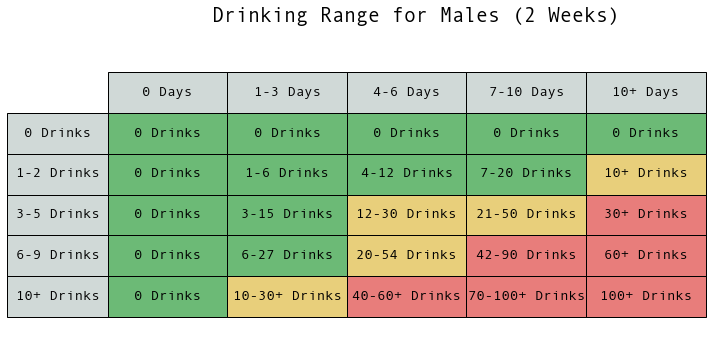

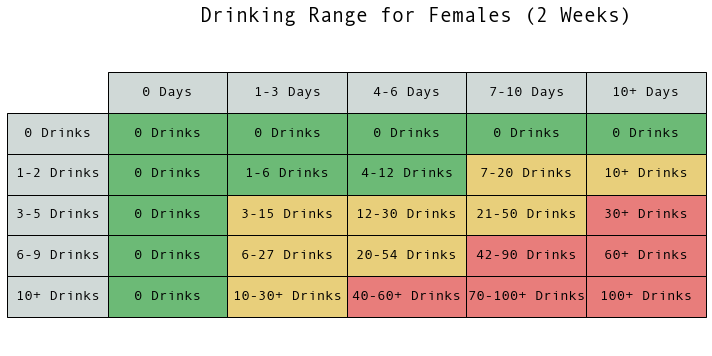

In [13]:
def alcohol_table(gender):

    plt.figure(figsize=(10,5))
    
    with open('../data_file/recommendation_data/alcohol_limit_table.csv', encoding='utf-8-sig') as alcohol_limit_table:
        csv_reader = reader(alcohol_limit_table)
        rows = list(csv_reader)

    #men and women have diffent colors associate with then due to the different alcohol limits
    if (gender == 'Male'): 
        
        
        plt.suptitle('          Drinking Range for Males (2 Weeks)',fontsize = 20,fontfamily = 'Andale Mono')
        colors = [['#6cba76','#6cba76','#6cba76','#6cba76','#6cba76'],
                  [ '#6cba76','#6cba76','#6cba76','#6cba76','#e8cf7b'],
                  [ '#6cba76','#6cba76','#e8cf7b','#e8cf7b','#e87d7b'],
                  [ '#6cba76','#6cba76','#e8cf7b','#e87d7b','#e87d7b'],
                  [ '#6cba76','#e8cf7b','#e87d7b','#e87d7b','#e87d7b']]
        

    elif (gender == 'Female'):
        plt.suptitle('          Drinking Range for Females (2 Weeks)',fontsize = 20,fontfamily = 'Andale Mono')
        
        colors = [['#6cba76','#6cba76','#6cba76','#6cba76','#6cba76'],
                  [ '#6cba76','#6cba76','#6cba76','#e8cf7b','#e8cf7b'],
                  [ '#6cba76','#e8cf7b','#e8cf7b','#e8cf7b','#e87d7b'],
                  [ '#6cba76','#e8cf7b','#e8cf7b','#e87d7b','#e87d7b'],
                  [ '#6cba76','#e8cf7b','#e87d7b','#e87d7b','#e87d7b']]
        
 
    #populate table with csv file
    column_headers = rows.pop(0)
    row_headers = [x.pop(0) for x in rows]

    cell_text = []
    for row in rows:
        cell_text.append([x for x in row])
       
    #specify font
    plt.rcParams['font.family'] = 'Andale Mono'
        
    #plot the table
    the_table = plt.table(cellText=cell_text,
                          cellLoc='center',
                          cellColours = colors,
                          rowLabels= row_headers,
                          rowColours=["#d0d9d7"] * 5,
                          rowLoc='center',
                          colLabels=column_headers,
                          colColours=["#d0d9d7"] * 5,
                          loc='center')
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    the_table.scale(1, 3)
    
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.box(on=None)


    plt.draw()
    
    plt.tight_layout()
    plt.savefig(f"../data_file/graphs/PNG/3014_alcohol_table_{gender}.png", dpi=300)
    plt.savefig(f"../data_file/graphs/JPG/3014_alcohol_table_{gender}.jpg", dpi=300)

#function that create a table for both males and females
for gender in alcohol_df['gender'].unique():
    alcohol_table(gender)

## Determining the Drinking Status of Our Surveyors
In this particular section we want to determine what the drinking statuses of our surveyors are.<br>
Based on the amount of days that they drink and the number of drinks they consume, we will calculate a range that tells us how much they drank within the last 2 weeks.<br>
Most Americans with be either above (red) or below (green) the alcoholic threshold, however, since we are working with ranges, there are instances where we cant accurately say if someone is above or below the alcohol limit and so we will label this as "Undeterminable" (yellow).<br>
Example:<br>
• Male<br>
• 4-6 Days<br>
• 3-5 Drinks<br>
This man would drink somewhere between 12-30 Drinks in 2 weeks. <br>
We cannot determine whether or not he has reached the 28 Drink limit or not.<br>
Therfore his drinking status is undeterminable

## Calculations and Manipulations to Determine the Drinking Status of Our Surveyors
### Splitting the Strings

In [14]:
#we don't want to alter the ['standard_drinks_a_day'] column so we will make a copy callled ['calc_drink'] to work with
alcohol_df["calc_drink"] = alcohol_df["standard_drinks_a_day"].copy()

#the values in our column ar in the format of 'x-y Drinks'. We want to have only the numbers so that we can calculate statuses based off them

#first we want to split at the ' ' (space) and get the first element e.g '1-2 Drinks' -> '1-2'
alcohol_df["calc_drink"] = alcohol_df["calc_drink"].str.split(' ').str[0]

#then we split at the +. This is for values like 10+. e.g '10+' -> '10'. And now we have our number 
alcohol_df["calc_drink"] = alcohol_df["calc_drink"].str.split('+').str[0]

#then we split at the -. For the max value we take the 2nd element e.g '1-2' -> 2
alcohol_df["num_drinks_max"] = alcohol_df["calc_drink"].str.split('-')

#then we split at the -. For the mminax value we take the 1st element e.g '1-2' -> 1
alcohol_df["num_drinks_min"] = alcohol_df["calc_drink"].str.split('-')



#we don't want to alter the ['day_alcohol_2weeks'] column so we will make a copy callled ['calc_days'] to work with. We follow the same splitting routine as above
alcohol_df["calc_days"] = alcohol_df["day_alcohol_2weeks"].copy()   
alcohol_df["calc_days"] = alcohol_df["calc_days"].str.split(' ').str[0]
alcohol_df["calc_days"] = alcohol_df["calc_days"].str.split('+').str[0]
alcohol_df["num_days_max"] = alcohol_df["calc_days"].str.split('-')
alcohol_df["num_days_min"] = alcohol_df["calc_days"].str.split('-')

### Converting the Strings to Ints
We cannot perform calculations on strings to our numbers need to be ints

In [15]:
def num_drinks_min(min_drinks):
        return int(min_drinks[0])    

def num_drinks_max(max_drinks):
    if (len(max_drinks) == 1):
        return int(max_drinks[0])
    
    elif (len(max_drinks) > 1):
        return int(max_drinks[1])
    
def num_days_min(min_days):
        return int(min_days[0])
    
def num_days_max(max_days):
    if (len(max_days) == 1):
        return int(max_days[0])
    
    elif (len(max_days) > 1):
        return int(max_days[1])

alcohol_df["num_drinks_min"] = alcohol_df["num_drinks_min"].apply(lambda x: num_drinks_min(x))

alcohol_df["num_drinks_max"] = alcohol_df["num_drinks_max"].apply(lambda x: num_drinks_max(x))

alcohol_df["num_days_min"] = alcohol_df["num_days_min"].apply(lambda x: num_days_min(x))

alcohol_df["num_days_max"] = alcohol_df["num_days_max"].apply(lambda x: num_days_max(x))


### Calculating the Max and Min Values of How Much Alcohol People Consume in 2 Weeks

In [16]:
#we want to calculate the minimum and maximum values of the range of alcohol people drink in 2 weeks
def calculated_drinks_min(min_drinks,min_day):
    return min_drinks * min_day


def calculated_drinks_max(num_drinks_min,num_drinks_max,min_days,max_days):
    if (min_days==max_days):
        return num_drinks_min*min_days
        
    else:
        return num_drinks_max*max_days

alcohol_df['calculated_drinks_min'] = alcohol_df.apply(lambda x: calculated_drinks_min(x['num_drinks_min'], x['num_days_min']), axis=1)
alcohol_df['calculated_drinks_max'] = alcohol_df.apply(lambda x: calculated_drinks_max(x['num_drinks_min'],x['num_drinks_max'], x['num_days_min'], x['num_days_max']), axis=1)


### Create a String Range Value

In [17]:
#we now have the numbers but we want them back in the orignal format of "x-y Drinks"
def create_total_drinks_string(min_drinks_calc, max_drinks_calc):
    
    # drinking ranges needs a different format
    
    #returns a string in the format of "x Drinks" e.g "0 Drinks"
    if (min_drinks_calc == 0 and max_drinks_calc == 0): 
        string = f"{min_drinks_calc} Drinks"
        return string
    
    #returns a string in the format of "x+ Drinks" e.g "10+ Drinks"
    elif ((min_drinks_calc == max_drinks_calc) ):
        string = f"{min_drinks_calc}+ Drinks"
        return string
    
    #returns a string in the format of "x-y+ Drinks" e.g "10-30+ Drinks"
    elif ((min_drinks_calc == 10 and max_drinks_calc != 0)or(min_drinks_calc != 0 and max_drinks_calc == 10) ):
        string = f"{min_drinks_calc}-{max_drinks_calc}+ Drinks"
        return string
    
    #returns a string in the format of "x-y Drinks" e.g "3-15 Drinks"
    else:
        string = f"{min_drinks_calc}-{max_drinks_calc} Drinks"
        return string

alcohol_df['total_drinks'] = alcohol_df.apply(lambda x: create_total_drinks_string(x['calculated_drinks_min'], x['calculated_drinks_max']), axis=1)
   


### Determine Drinking Status

In [18]:
#now we want to see if someones drinking range puts them above or below the alcohol threshold. Keeping in mind there can be people whose ranges are undeterminable
def limit_status(gender,min_drinks_calc, max_drinks_calc):
    
    #men limit is 28
    if gender == 'Male':
        if (min_drinks_calc > male_alcohol_limit):
            return 'Above Drinking Limit'

        elif (max_drinks_calc < male_alcohol_limit ):
            return 'Below Drinking Limit'

        elif (min_drinks_calc < male_alcohol_limit and max_drinks_calc > male_alcohol_limit):
            return 'Undeterminable Drinking Limit'
    
    #wommen limit is 28
    elif gender == 'Female':
        if (min_drinks_calc > female_alcohol_limit):
            return 'Above Drinking Limit'

        elif (max_drinks_calc < female_alcohol_limit ):
            return 'Below Drinking Limit'

        elif (min_drinks_calc < female_alcohol_limit and max_drinks_calc > female_alcohol_limit):
            return 'Undeterminable Drinking Limit' 
    
alcohol_df['limit_status'] = alcohol_df.apply(lambda x: limit_status(x['gender'],x['calculated_drinks_min'], x['calculated_drinks_max']), axis=1) 

### Making Minor Fixes to Drinking Status Allocation
Certain values in our columsn were being labelled incorrectly.<br>
e.g 10+ Drinks was labelled as 'Below Drinking Limit' however the + implies that people can drink over 28 (Male) or 14 (Female), meaning that their drinking range is 'Undeterminable' NOT 'Below Drinking Limit'

In [19]:
def fix_yellow(total_drinks, limit_status):
    if ('+' in total_drinks and limit_status == 'Below Drinking Limit'):
        return 'Undeterminable Drinking Limit' 
    else:
        return limit_status

    
alcohol_df['limit_status'] = alcohol_df.apply(lambda x: fix_yellow(x['total_drinks'],x['limit_status']), axis=1)

### How Many Americans Are Above or Below (or Undeterminable) the Alcohol Threshold?

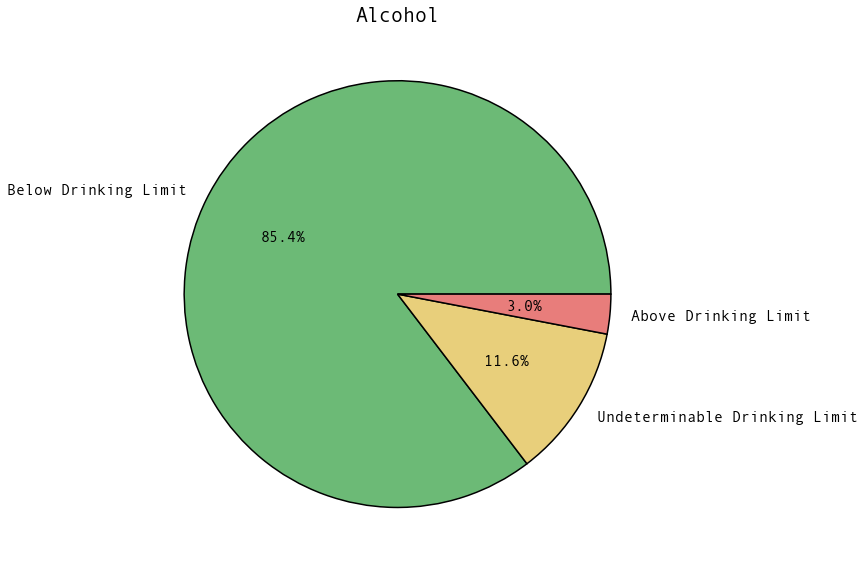

In [20]:
fig,ax= plt.subplots(figsize=(18, 8))
colors = ('#6cba76',  '#e8cf7b','#e87d7b')
alcohol_level = alcohol_df['limit_status'].value_counts().index
candidates = alcohol_df['limit_status'].value_counts()

ax.pie(candidates, 
       labels= alcohol_level,
       autopct='%.1f%%',
       textprops={'fontsize': 15},
       colors = colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Alcohol',fontsize = 20)

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3014_alcohol_threshold.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3014_alcohol_threshold.jpg', dpi=300)

We can see that most Americans (85.4%) fall below the threshold while a very small percentage (3%) are above it. 11.6% of people's drinking ranges are undeterminable and we will be ommitting these from further analysis.

### Does the Percentage of People above the Alcohol Limit Get Bigger as Sleep Quality Worsens?
First we must group our caffeine df accoring to different sleep ratings

In [21]:
alcohol_df_group = alcohol_df.groupby(['sleep_rating', 'limit_status'])['sleep_rating'].size().unstack('limit_status')
alcohol_df_group

limit_status,Above Drinking Limit,Below Drinking Limit,Undeterminable Drinking Limit
sleep_rating,,,
Fairly Bad,7,159,26
Fairly Good,19,478,72
Very Bad,3,43,2
Very Good,1,172,16


We won't be using the "Undeterminable Drinking Limit" in our analysis so we can drop it.

In [22]:
above_below_df = alcohol_df_group.copy()
above_below_df=above_below_df.drop(labels=['Undeterminable Drinking Limit'], axis=1)
above_below_df

limit_status,Above Drinking Limit,Below Drinking Limit
sleep_rating,,
Fairly Bad,7,159
Fairly Good,19,478
Very Bad,3,43
Very Good,1,172


We can see that there are 4 different sleep ratings:<br>
'Fairly Bad'<br>
'Fairly Good'<br>
'Very Bad'<br>
'Very Good'<br>
This order is based on how they appear in our above_below_df and wouldn't make much sense if we graphed it in this order.<br><br>Ideally the order should go from best sleep rating to worst sleep rating:<br>
'Very Good'<br>
'Fairly Good'<br>
'Fairly Bad'<br>
'Very Bad'<br>

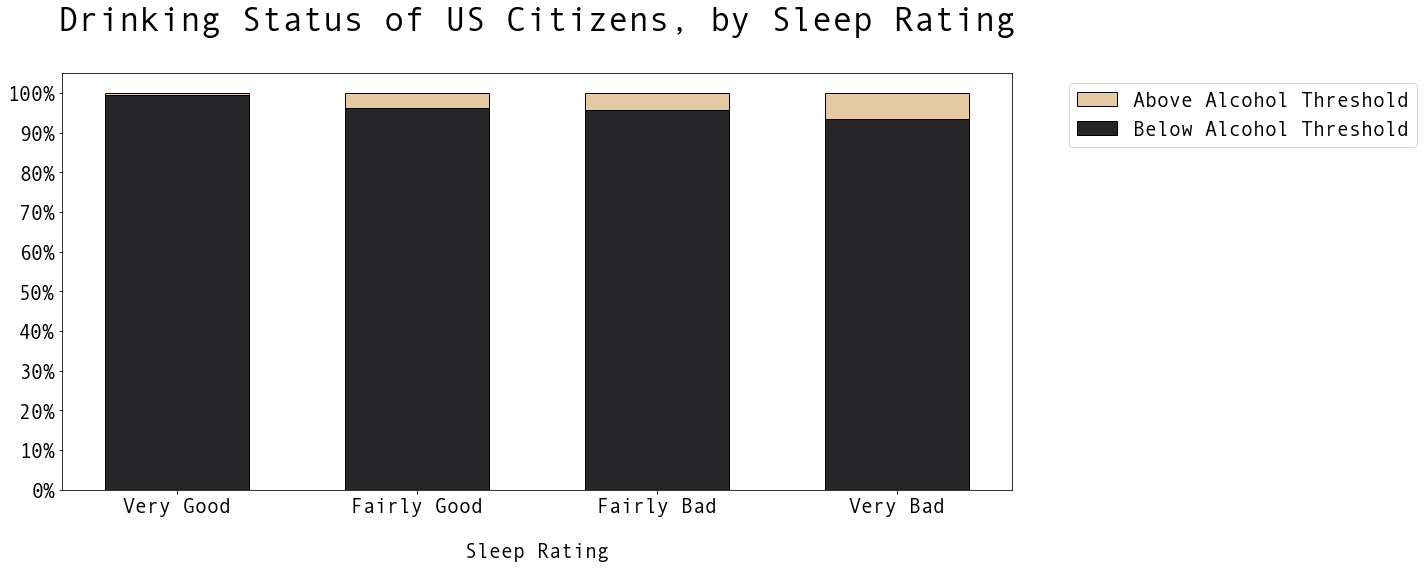

In [23]:
order = ['Very Good','Fairly Good', 'Fairly Bad','Very Bad']
alcohol_df_group = alcohol_df_group.loc[order] #re-order the df

#get values for each rating and threshold level:
#Very Good
very_good_above = alcohol_df_group['Above Drinking Limit']['Very Good']
very_good_below= alcohol_df_group['Below Drinking Limit']['Very Good']
total_very_good_drink_status = very_good_above + very_good_below

#Fairly Good
fairly_good_above = alcohol_df_group['Above Drinking Limit']['Fairly Good']
fairly_good_below= alcohol_df_group['Below Drinking Limit']['Fairly Good']
total_fairly_good_drink_status = fairly_good_above + fairly_good_below

#Fairly Bad
fairly_bad_above = alcohol_df_group['Above Drinking Limit']['Fairly Bad']
fairly_bad_below= alcohol_df_group['Below Drinking Limit']['Fairly Bad']
total_fairly_bad_drink_status = fairly_bad_above + fairly_bad_below

#Very Bad
very_bad_above = alcohol_df_group['Above Drinking Limit']['Very Bad']
very_bad_below= alcohol_df_group['Below Drinking Limit']['Very Bad']
total_very_bad_drink_status = very_bad_above + very_bad_below

#labels for the graph are each sleep rating
label_sleep_rating= alcohol_df_group.index

#find the percentage of people above the alcohol threshold for each sleep rating
above = [(very_good_above/total_very_good_drink_status*100),
              (fairly_good_above/total_fairly_good_drink_status*100),
              (fairly_bad_above/total_fairly_bad_drink_status*100),
             (very_bad_above/total_very_bad_drink_status*100)]

#find the percentage of people below the alcohol threshold for each sleep rating
below = [(very_good_below/total_very_good_drink_status*100),
              (fairly_good_below/total_fairly_good_drink_status*100),
              (fairly_bad_below/total_fairly_bad_drink_status*100),
              (very_bad_below/total_very_bad_drink_status*100)]

width = .6   
fig, ax = plt.subplots(figsize=(20, 8))

#create bar for those above the alcohol threshold in each sleep rating
ax.bar(label_sleep_rating,
       above, width, 
       bottom=below,
       label='Above Alcohol Threshold',
       color='#E5C9A2',
       edgecolor='black')

#create bar for those below the alcohol threshold in each sleep rating
ax.bar(label_sleep_rating, 
       below, 
       width, 
       label='Below Alcohol Threshold',
       color='#262629',
       edgecolor='black')



ax.set_title('Drinking Status of US Citizens, by Sleep Rating\n',fontsize = 34,fontfamily = 'Andale Mono')

ax.set_xlabel('\nSleep Rating', fontsize=20,fontfamily = 'Andale Mono')
ax.xaxis.set_tick_params(labelsize=20)
plt.xticks(fontname = 'Andale Mono') 

ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.yticks(np.arange(0, 100+1, 10)) 
plt.yticks(fontname = 'Andale Mono') 

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3014_drinking_status_sleep_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3014_drinking_status_sleep_rating.jpg', dpi=300)



### Does the Percentage of People above the Alcohol Limit Get Bigger as Health Quality Worsens?

First we must group our caffeine df accoring to different health ratings

In [24]:
alcohol_df_group_health = alcohol_df.groupby(['health_rating', 'limit_status'])['health_rating'].size().unstack('limit_status')
alcohol_df_group_health

limit_status,Above Drinking Limit,Below Drinking Limit,Undeterminable Drinking Limit
health_rating,,,
Excellent,5,205,28
Fair,7,133,18
Good,17,492,69
Poor,1,22,1


We won't be using the "Undeterminable Drinking Limit" in our analysis so we can drop it.

In [25]:
above_below_df_health = alcohol_df_group_health.copy()
above_below_df_health=above_below_df_health.drop(labels=['Undeterminable Drinking Limit'], axis=1)
above_below_df_health

limit_status,Above Drinking Limit,Below Drinking Limit
health_rating,,
Excellent,5,205
Fair,7,133
Good,17,492
Poor,1,22


We can see that there are 4 different sleep ratings:<br>
'Excellent'<br>
'Fair'<br>
'Good'<br>
'Poor'<br>
This order is based on how they appear in our above_below_df and wouldn't make much sense if we graphed it in this order.<br><br>Ideally the order should go from best sleep rating to worst sleep rating:<br>
'Excellent'<br>
'Good'<br>
'Fair'<br>
'Poor'<br>

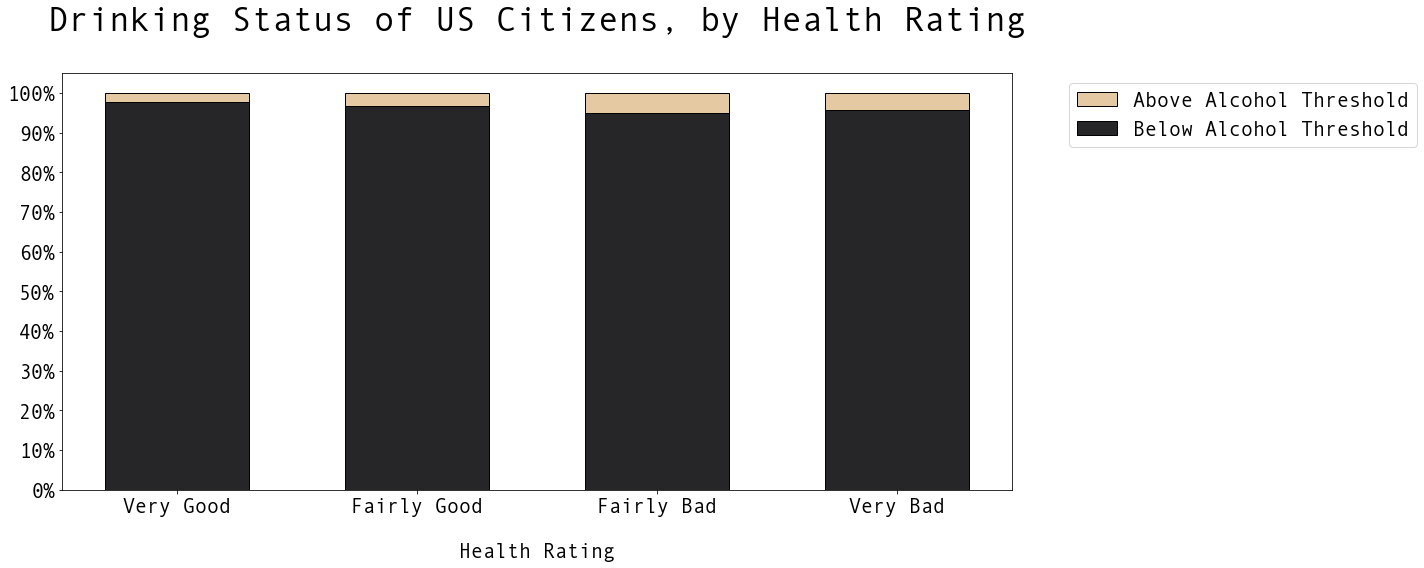

In [26]:
order = ['Excellent','Good', 'Fair','Poor']
above_below_df_health = above_below_df_health.loc[order]#re-order the df

#get values for each rating and threshold level:
#Excellent
excellent_above = above_below_df_health['Above Drinking Limit']['Excellent']
excellent_below= above_below_df_health['Below Drinking Limit']['Excellent']
total_excellent_drink_status = excellent_above + excellent_below

#Good
good_above = above_below_df_health['Above Drinking Limit']['Good']
good_below= above_below_df_health['Below Drinking Limit']['Good']
total_good_drink_status = good_above + good_below

#Fair
fair_above = above_below_df_health['Above Drinking Limit']['Fair']
fair_below= above_below_df_health['Below Drinking Limit']['Fair']
total_fair_drink_status = fair_above + fair_below

#Poor
poor_above = above_below_df_health['Above Drinking Limit']['Poor']
poor_below= above_below_df_health['Below Drinking Limit']['Poor']
total_poor_drink_status = poor_above + poor_below

#labels for the graph are each health rating
label_sleep_rating= alcohol_df_group.index

#find the percentage of people above the alcohol threshold for each health rating
above = [(excellent_above/total_excellent_drink_status*100),
              (good_above/total_good_drink_status*100),
              (fair_above/total_fair_drink_status*100),
             (poor_above/total_poor_drink_status*100)]

#find the percentage of people below the alcohol threshold for each health rating
below = [(excellent_below/total_excellent_drink_status*100),
              (good_below/total_good_drink_status*100),
              (fair_below/total_fair_drink_status*100),
              (poor_below/total_poor_drink_status*100)]


width = .6   
fig, ax = plt.subplots(figsize=(20, 8))

#create bar for those above the alcohol threshold in each health rating
ax.bar(label_sleep_rating, above, width,  bottom=below,label='Above Alcohol Threshold',color='#E5C9A2',edgecolor='black')

#create bar for those below the alcohol threshold in each health rating
ax.bar(label_sleep_rating, below, width, label='Below Alcohol Threshold',color='#262629',edgecolor='black')




ax.set_title('Drinking Status of US Citizens, by Health Rating\n',fontsize = 34,fontfamily = 'Andale Mono')

ax.set_xlabel('\nHealth Rating', fontsize=20,fontfamily = 'Andale Mono')
ax.xaxis.set_tick_params(labelsize=20)
plt.xticks(fontname = 'Andale Mono') 

ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.yticks(np.arange(0, 100+1, 10)) 
plt.yticks(fontname = 'Andale Mono') 

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})

plt.tight_layout()


plt.savefig('../data_file/graphs/PNG/3014_drinking_status_health_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3014_drinking_status_health_rating.jpg', dpi=300)


In [27]:
alcohol_df_group = alcohol_df.groupby(['limit_status', 'health_rating'])['limit_status'].count().unstack('health_rating')
alcohol_df_group

health_rating,Excellent,Fair,Good,Poor
limit_status,,,,
Above Drinking Limit,5,7,17,1
Below Drinking Limit,205,133,492,22
Undeterminable Drinking Limit,28,18,69,1


In [28]:
alcohol_df_group = alcohol_df.groupby(['limit_status', 'sleep_rating'])['limit_status'].count().unstack('sleep_rating')
alcohol_df_group

sleep_rating,Fairly Bad,Fairly Good,Very Bad,Very Good
limit_status,,,,
Above Drinking Limit,7,19,3,1
Below Drinking Limit,159,478,43,172
Undeterminable Drinking Limit,26,72,2,16


## Apply the Cluster Groups to the Relevant Data

In [29]:
mod = '../data_file/cleaned_data_pickle/cluster_oriented_2013_poll.pickle'
cluster_df = pd.read_pickle(mod)

In [30]:
cluster_df.head(30)

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions,age_bin,bmi_bin,cluster_group
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West,30-40,20-25,2.0
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South,50-60,30-35,4.0
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West,50-60,25-30,6.0
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South,NaN,NaN,NaN
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast,50-60,20-25,NaN
5,5,39,1,Female,MA,18,14,1100.0,1975.0,875.0,...,2,White/Caucasian,1150.0,2075.0,66.0,23.24,Northeast,30-40,20-25,1.0
6,6,36,2,Female,LA,18,9,1100.0,1850.0,750.0,...,2,White/Caucasian,1200.0,2100.0,60.0,35.54,South,30-40,35-40,NaN
7,7,44,3,Male,NY,10,15,900.0,2000.0,1100.0,...,2,White/Caucasian,900.0,2000.0,67.0,19.11,Northeast,40-50,15-20,3.0
8,7,34,1,Female,WA,12,12,950.0,1925.0,975.0,...,2,White/Caucasian,950.0,2000.0,69.0,19.93,West,30-40,15-20,NaN
9,8,38,1,Male,NY,20,7,1150.0,1800.0,650.0,...,2,Refused,1201.7,2175.0,70.0,24.39,Northeast,30-40,20-25,14.0


In [31]:
alcohol_df['cluster_group'] = cluster_df['cluster_group']

In [32]:
alcohol_cluster_df = alcohol_df.groupby(['cluster_group', 'limit_status'])['cluster_group'].count().unstack('limit_status')

In [33]:
alcohol_cluster_df

limit_status,Above Drinking Limit,Below Drinking Limit,Undeterminable Drinking Limit
cluster_group,,,
1.0,2,86,14
2.0,3,82,11
3.0,3,104,9
4.0,2,61,9
6.0,2,51,6
14.0,4,60,7


In [34]:
alcohol_cluster_df['cluster_alcohol_threshold_percent'] = alcohol_cluster_df['Above Drinking Limit']/(alcohol_cluster_df['Below Drinking Limit']+alcohol_cluster_df['Above Drinking Limit'])

In [35]:
alcohol_cluster_df.sort_values('cluster_alcohol_threshold_percent', ascending=False, inplace=True)

In [36]:
alcohol_cluster_df.to_pickle('../data_file/cleaned_data_pickle/alcohol_cluster_results.pickle')

## Apply the Cluster Groups to the Relevant Data

In [37]:
mod = '../data_file/cleaned_data_pickle/cluster_oriented_2013_poll.pickle'
cluster_df = pd.read_pickle(mod)

In [38]:
cluster_df

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions,age_bin,bmi_bin,cluster_group
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West,30-40,20-25,2.0
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South,50-60,30-35,4.0
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West,50-60,25-30,6.0
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South,NaN,NaN,NaN
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast,50-60,20-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast,40-50,15-20,NaN
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast,20-30,20-25,2.0
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast,40-50,20-25,NaN
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest,50-60,30-35,3.0


In [39]:
alcohol_df['cluster_group'] = cluster_df['cluster_group']

In [40]:
alcohol_cluster_df = alcohol_df.groupby(['cluster_group', 'limit_status'])['cluster_group'].count().unstack('limit_status')

In [41]:
alcohol_cluster_df['cluster_alcohol_threshold_percent'] = alcohol_cluster_df['Above Drinking Limit']/(alcohol_cluster_df['Below Drinking Limit'] + alcohol_cluster_df['Above Drinking Limit'])

In [42]:
alcohol_cluster_df.sort_values('cluster_alcohol_threshold_percent', ascending=False, inplace=True)

In [43]:
alcohol_cluster_df.to_pickle('../data_file/cleaned_data_pickle/alcohol_cluster_results.pickle')

## Save Data to a Pickle File

In [44]:
alcohol_df.to_pickle('../data_file/cleaned_data_pickle/alcohol_dataframe_results.pickle')